In [3]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from collections import Counter


In [4]:
import stats

In [5]:
df = pd.read_csv("../用户点击广告行为预测竞赛数据/my_train.csv").drop('Unnamed: 0',axis=1)

In [9]:
A = ['A1', 'A2', 'A3']
B = ['B1', 'B2', 'B3']
C = ['C1', 'C2', 'C3']

In [10]:
def log_e_feature(df,feat):
    new_feat = df[feat] + abs(df[feat].min())
    ### random forest 
    new_feat = np.log(new_feat+1)
    name = feat+'_log'
    return pd.DataFrame({name:new_feat})

In [11]:
def cross_feature(df,feat1,feat2):
    new_feat = np.multiply(df[feat1],df[feat2])
    name = feat1 + feat2 
    return pd.DataFrame({name:new_feat})

In [12]:
def draw_quantile(df,feat,bins,which_q):
    quantile_list = [0,.25,.5,.75,1.]
    quantiles = df[feat].quantile(quantile_list)

    fig,ax = plt.subplots()
    df[feat].hist(bins = bins,grid = False)
    
    if which_q == 'All':
            for quantile in quantiles :
                qv1 = plt.axvline(quantile,color='r')
    else :
            qv1 = plt.axvline(quantiles[which_q],color='r')
#    qv1 = plt.axvline(quantiles[2],color='r')
    return quantiles

In [13]:
def split_by_quantile(df,feat,which_q):
    quantile_list = [0,.25,.5,.75,1.]
    quantiles = df[feat].quantile(quantile_list)
    q1 = quantiles[which_q]
    new_feat = df[feat].map(lambda x: 1 if x>q1 else -1)
    name = feat+'_q'
    return pd.DataFrame({name:new_feat})

In [14]:
def split_by_hand(df,feat,list_):
    quantile_list = [0,.25,.5,.75,1.]
    quantiles = df[feat].quantile(quantile_list)
    q1 = quantiles[which_q]
    new_feat = df[feat].map(lambda x: 1 if x>q1 else -1)
    name = feat+'_q'
    return pd.DataFrame({name:new_feat})

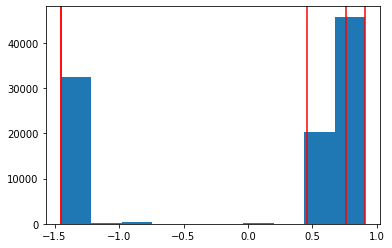

In [15]:
q_list = draw_quantile(df,'A1',10,'All')
a1 = split_by_quantile(df,'A1',.5)
df = df.join(a1)

In [16]:
a2 = log_e_feature(df,'A2')
df = df.join(a2)

In [17]:
a3 = log_e_feature(df,'A3')
df = df.join(a3)

In [18]:
b2 = log_e_feature(df,'B2')
df = df.join(b2)

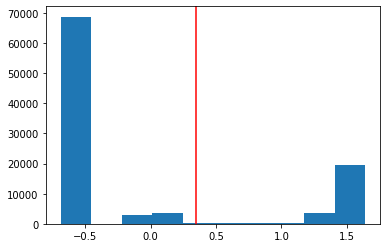

In [19]:
# q_list = draw_quantile(df,'B1',10,'All')
# b1 = split_by_quantile(df,'B1',.5)
# df = df.join(b1)
def myfunc(x,p1,p2):
    if x>p2:
        return 2
    if x<p1:
        return 0
    else :
        return 1

fig,ax = plt.subplots()
df['B1'].hist(bins = 10,grid = False)
qv1 = plt.axvline(0.35,color='r')
#    qv1 = plt.axvline(quantiles[2],color='r')

new_feat = df['B1'].map(lambda x: myfunc(x,-0.25,0.35))
new_feat = pd.DataFrame({'B1_q':new_feat})
#df = df.join(new_feat)

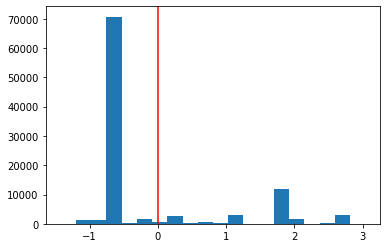

In [20]:
def myfunc2(x,p1):
    if x>p1:
        return 1
    return 0

fig,ax = plt.subplots()
df['B3'].hist(bins = 20,grid = False)
qv1 = plt.axvline(0,color='r')

new_feat = df['B3'].map(lambda x: myfunc2(x,20))
new_feat = pd.DataFrame({'B3_q':new_feat})
#df = df.join(new_feat)

In [21]:
b3 = log_e_feature(df,'B3')
df = df.join(b3)

In [22]:
c1 = log_e_feature(df,'C1')
df = df.join(c1)

In [23]:
c2 = log_e_feature(df,'C2')
df = df.join(c2)

In [24]:
c3 = log_e_feature(df,'C3')
df = df.join(c3)

In [25]:
e1 = log_e_feature(df,'E1')
df = df.join(e1)

In [26]:
e3 = log_e_feature(df,'E3')
df = df.join(e3)

In [27]:
e6 = log_e_feature(df,'E6')
df = df.join(e6)

In [28]:

e14 = log_e_feature(df,'E14')
df = df.join(e14)

In [29]:
e20 = log_e_feature(df,'E20')
df = df.join(e20)

In [30]:
e27 = log_e_feature(df,'E27')
df = df.join(e27)

In [31]:
e28 = log_e_feature(df,'E28')
df = df.join(e28)

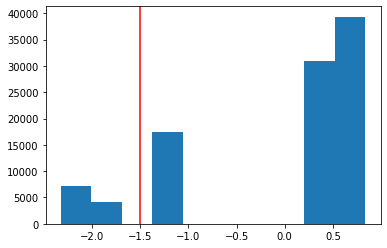

In [32]:
fig,ax = plt.subplots()
df['E2'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1.5,color='r')


new_feat = df['E2'].map(lambda x: myfunc(x,-1.5,0))
new_feat = pd.DataFrame({'E2_q':new_feat})
df = df.join(new_feat)

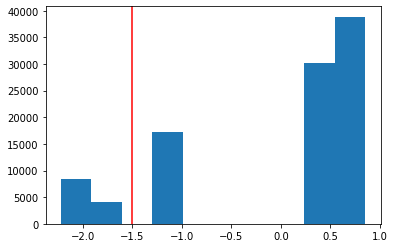

In [33]:
fig,ax = plt.subplots()
df['E5'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1.5,color='r')


new_feat = df['E5'].map(lambda x: myfunc(x,-1.5,0))
new_feat = pd.DataFrame({'E5_q':new_feat})

df = df.join(new_feat)

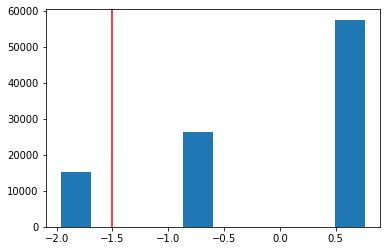

In [34]:
fig,ax = plt.subplots()
df['E7'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1.5,color='r')


new_feat = df['E7'].map(lambda x: myfunc(x,-1.5,0))
new_feat = pd.DataFrame({'E7_q':new_feat})

df = df.join(new_feat)

In [73]:
df.columns

Index(['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'E1',
       ...
       'E7_q', 'E9_q', 'E10_q', 'E12_q', 'E17_q', 'E23_q', 'E24_q', 'E28_q',
       'E29_q', 'F2F3'],
      dtype='object', length=1984)

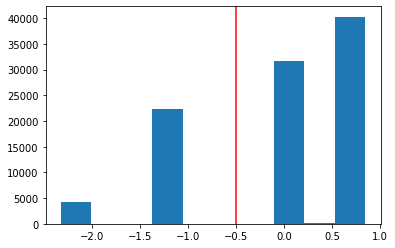

In [35]:
fig,ax = plt.subplots()
df['E9'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-0.5,color='r')

def myfunc3(x,p1,p2,p3):
    if x>p3:
        return 3
    if x<p1:
        return 0 
    if (x<p3 and x>p2):
        return 2
    
    else: return 1

new_feat = df['E9'].map(lambda x: myfunc3(x,-1.5,-0.5,0.4))
new_feat = pd.DataFrame({'E9_q':new_feat})

df = df.join(new_feat)

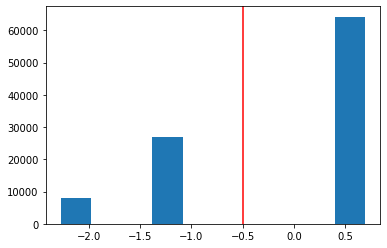

In [36]:
fig,ax = plt.subplots()
df['E10'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-0.5,color='r')

new_feat = df['E10'].map(lambda x: myfunc(x,-1.5,-0.5))
new_feat = pd.DataFrame({'E10_q':new_feat})

df = df.join(new_feat)

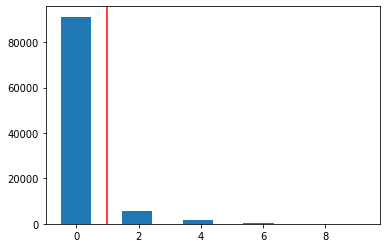

In [37]:
fig,ax = plt.subplots()
df['E12'].hist(bins = 10,grid = False)
qv1 = plt.axvline(1,color='r')

new_feat = df['E12'].map(lambda x: myfunc3(x,1,3,5))
new_feat = pd.DataFrame({'E12_q':new_feat})

df = df.join(new_feat)

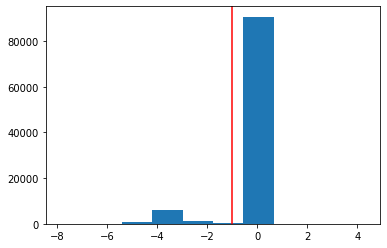

In [38]:
fig,ax = plt.subplots()
df['E15'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1,color='r')

new_feat = df['E15'].map(lambda x: myfunc2(x,-1))
new_feat = pd.DataFrame({'E15_q':new_feat})


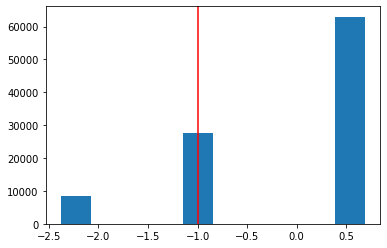

In [39]:
fig,ax = plt.subplots()
df['E17'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1,color='r')

new_feat = df['E17'].map(lambda x: myfunc(x,-1.5,-0.5))
new_feat = pd.DataFrame({'E17_q':new_feat})

df = df.join(new_feat)

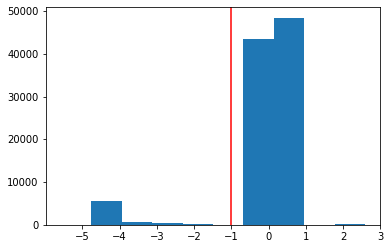

In [40]:
fig,ax = plt.subplots()
df['E23'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1,color='r')

new_feat = df['E23'].map(lambda x: myfunc2(x,-1))
new_feat = pd.DataFrame({'E23_q':new_feat})

df = df.join(new_feat)

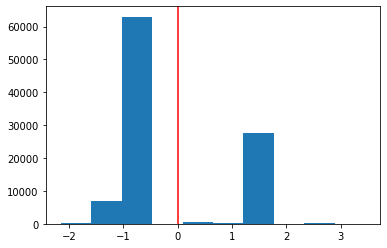

In [41]:
fig,ax = plt.subplots()
df['E24'].hist(bins = 10,grid = False)
qv1 = plt.axvline(0,color='r')

new_feat = df['E24'].map(lambda x: myfunc2(x,0))
new_feat = pd.DataFrame({'E24_q':new_feat})

df = df.join(new_feat)

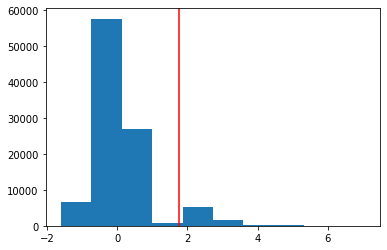

In [42]:
fig,ax = plt.subplots()
df['E28'].hist(bins = 10,grid = False)
qv1 = plt.axvline(1.75,color='r')

new_feat = df['E28'].map(lambda x: myfunc2(x,1.75))
new_feat = pd.DataFrame({'E28_q':new_feat})

df = df.join(new_feat)

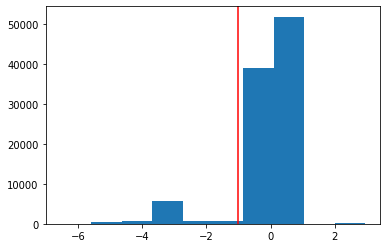

In [43]:
fig,ax = plt.subplots()
df['E29'].hist(bins = 10,grid = False)
qv1 = plt.axvline(-1,color='r')

new_feat = df['E29'].map(lambda x: myfunc2(x,-1))
new_feat = pd.DataFrame({'E29_q':new_feat})

df = df.join(new_feat)

## Cross feature

In [44]:
df = df.join( cross_feature(df,'F2','F3') )

In [49]:
newdf = df.copy()
newdf = newdf.join(cross_feature(newdf,'C1','C3'))
newdf = newdf.join(cross_feature(newdf,'C1_log','C3_log'))

##  Statistic Feature

In [57]:
def featureStatistics(df,start,end,name):
    mean_list = []
    #std_list =[]
    min_list = []
    #var_list = []
    max_list = []
    median_list = []
    #sker_list = []
    #kuri_list = []
    col = np.array(df.columns)
    start = int(np.argwhere(col == start ).ravel())
    if (end == start):  return pd.DataFrame()
    end = int(np.argwhere(col == end ).ravel())
    x = pd.DataFrame()
    for i in range(df.shape[0]):
        mean_list.append(np.mean(df.iloc[i][start:end].values))
    
        #std_list.append(np.std(df.iloc[i][start:end].values))
        min_list.append(np.min(df.iloc[i][start:end].values))
        #var_list.append(np.mean(df.iloc[i][start:end].values))
        max_list.append(np.max(df.iloc[i][start:end].values))
        median_list.append(np.median(df.iloc[i][start:end].values))
        #sker_list.append(stats.skew(df.iloc[i][start:end].values))
        #kuri_list.append(stats.kurtosis(df.iloc[i][start:end].values))
    
    a= pd.DataFrame({
       'mean_list'+name:mean_list,
        'min_list'+name:min_list,\
        'max_list'+name : max_list,'median_list'+name :median_list
        #'kuri_list':kuri_list
    })
    return a

In [68]:
def create_fs(df,name):
    log = []
    q = []
    col = np.array(df.columns)
    idx = int(np.argwhere(col == 'A1_q').ravel())
    new_name = name + '_log'
    new_name_2 = name +'_q'
    for feat in list(df.columns[idx:1983]):
        if (name in feat and 'log' in feat):
            log.append(feat)
        elif (name in feat and 'q' in feat): 
            q.append(feat)
        else:
            pass
    print(log)
    print(q)
    log_ = featureStatistics(df,log[0],log[-1],new_name)
    q_ = featureStatistics(df,q[0],q[-1],new_name_2)
    print(f'{new_name} and {new_name_2}  : Done')
    df.join(log_)
    df.join(q_)
    return df

In [69]:
newdf = create_fs (newdf,'A')
newdf = create_fs (newdf,'B')
newdf = create_fs (newdf,'C')
newdf = create_fs (newdf,'E')

['A2_log', 'A3_log']
['A1_q']


KeyboardInterrupt: 

In [308]:
# a = featureStatistics(df,'A1','A3')
# df.join(a)
# a2 = featureStatistics(df,'B1','B3')
# a3 = featureStatistics(df,'C1','C3')
# a4 = featureStatistics(df,'E1_log')

KeyboardInterrupt: 

In [275]:
# col = np.array(df.columns)
# idx = np.argwhere(col == 'A1_q').ravel()
df.columns[:30]

Index(['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'E1', 'E2', 'E3',
       'E5', 'E6', 'E7', 'E9', 'E10', 'E12', 'E14', 'E15', 'E17', 'E20', 'E23',
       'E24', 'E27', 'E28', 'E29', 'F2', 'F3', 'label'],
      dtype='object')

In [351]:
X= df.drop('label',axis=1)
Y = df['label']

In [352]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, Y_train, Y_test = \
    train_test_split(X,Y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
log = GridSearchCV(LogisticRegression(),{'C':[1,0.1,10],'dual':[True],'max_iter':[1000]},cv=5)
log.fit(X_train,Y_train)

roc_auc_score(Y_test,log.predict_proba(X_test)[:,1])

0.7017784568002802

In [72]:

X = newdf.drop(columns=['label'])
Y = pd.DataFrame(newdf['label'])


X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.3,random_state = 0)

x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train).ravel()

rf2_params = {
    'n_jobs': -1,
    'n_estimators': 530,
    'warm_start': True, 
    'max_depth': 200,
    'min_samples_leaf': 3,
    'max_features' : None,
    'verbose': 0,
    'oob_score':True
}

newrf2 = RandomForestClassifier(**rf2_params)

newrf2.fit(x_train,y_train)


print(f'AUC train : {roc_auc_score(y_train,newrf2.predict_proba(x_train)[:,1])}')
print(f'AUC train : {roc_auc_score(Y_test,newrf2.predict_proba(x_test)[:,1])}')

AUC train : 0.9994905941530049
AUC train : 0.946010654256488


In [429]:
# df.to_csv("../用户点击广告行为预测竞赛数据/my_train_2.csv")
df.to_csv("../用户点击广告行为预测竞赛数据/my_train_2.csv")